<a href="https://colab.research.google.com/github/haythemtellili/Health-AI/blob/master/X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
/content/drive/My Drive/train

In [0]:
import numpy as np
import pandas as pd

from fastai.utils import *
from fastai.vision import *
from fastai.callbacks import *
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os

In [0]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()


In [0]:
print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)
#tfms=get_transforms(do_flip=True,flip_vert=True,max_lighting=0.2,max_zoom=1.1,max_warp=0.2,max_rotate=10)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=0.06, max_zoom=1.1, max_warp=0.0, max_lighting=0.1)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


In [0]:
path="/content/drive/My Drive/train"
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=tfms,
                                  valid_pct=0.2, 
                                  size=224, 
                                  bs=64).normalize(imagenet_stats)

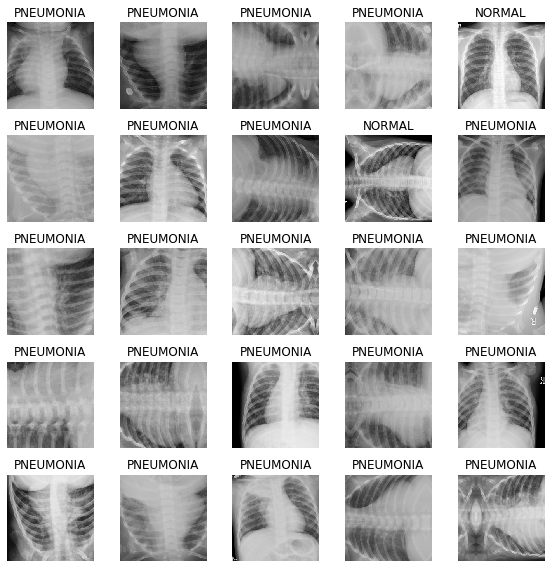

In [0]:
data.show_batch(rows=5, figsize=(8,8))

In [0]:
data.c

2

In [0]:
learn = create_cnn(data, models.resnet18, metrics=[accuracy])

In [0]:
learn.fit_one_cycle(3,slice(0.001))

epoch,train_loss,valid_loss,accuracy,time
0,1.136914,0.704199,0.631683,08:40
1,0.847838,0.282979,0.904950,01:25
2,0.669486,0.320874,0.900990,01:22


In [0]:
learn.save('stage-1')
learn.unfreeze()

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (2020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/train;

Valid: LabelList (505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Ba

In [0]:
learn.path

PosixPath('/content/drive/My Drive/train')